<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf

from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint

# importing SMOTE
from imblearn.over_sampling import SMOTE
import random

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.6 MB/s eta 0:00:00


## Data Overview

In [4]:
df_main = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project4-DeepLearing/bank-1.csv")

In [5]:
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_main.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df_main.shape

(10000, 14)

Observations
* There are 10000 rows and 14 columns

In [8]:
df_main.duplicated().sum()

0

Observation

* As per above result , there are no duplicate rows

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observations

* There are no missing values
* There are three features with object data type

In [10]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Observations

* `Credit Score`: It Ranges from 350 to 850. It is almost normally distributed with a hint of left skewness
* `Age`: The range of the index varies from 18 to 92 , with mean 38.92 and median 37 .
* `Tenure`: It is almost normally distributed with a hint of right skewness
* `Balance`: It has a high range and the difference in mean and median indicate the presence of outliers.
* `Estimated Salary`: It has a huge range from 11.58 to 199992.48 . It is slightly left skewed .

In [11]:
df_main.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observations :

* There are no null values present in the dataset

In [12]:
df_main.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
for i in df_main.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df_main[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


Observations:

* There are three objects data types i.e Geography ,surname and Gender

In [14]:
df_main = df_main.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

* Since rownumber , customerid and surname will not impact model that's why we are dropping these features .


In [15]:
df_main.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#copied datframe to new dataframe
df = df_main.copy()

## Exploratory Data Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

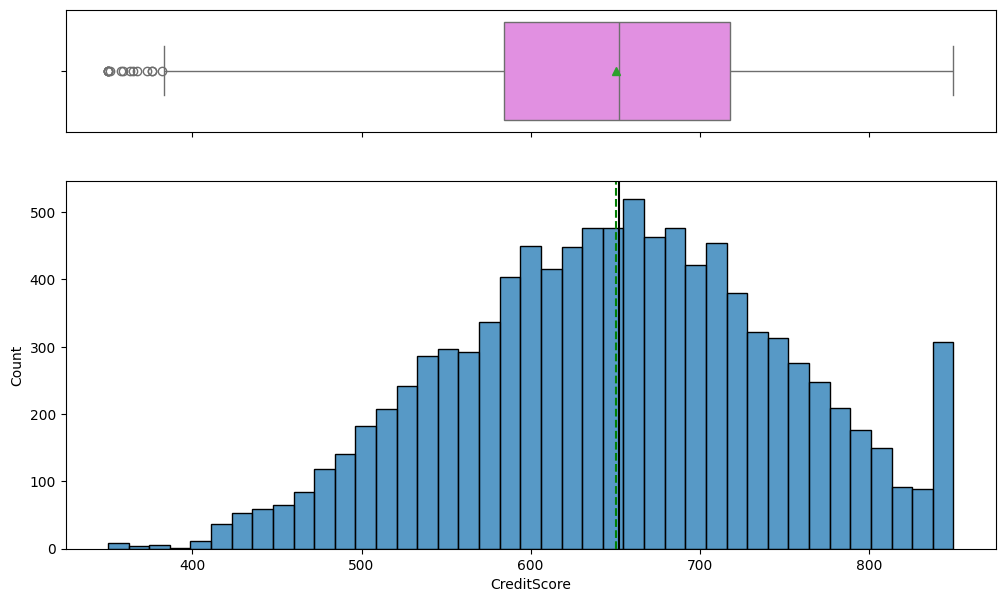

In [19]:
histogram_boxplot(df,'CreditScore')

Observations
* Credit score is looking normally distributed with slightly of left skewed

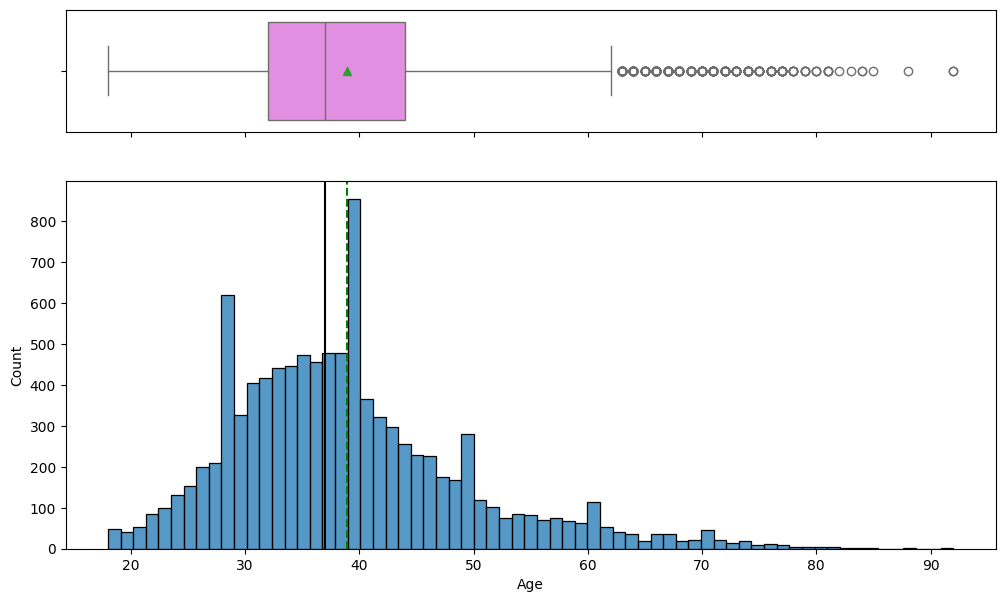

In [20]:
histogram_boxplot(df,'Age')

Observations

* As we see above , there are outliers present
* It ie slightly right skewed

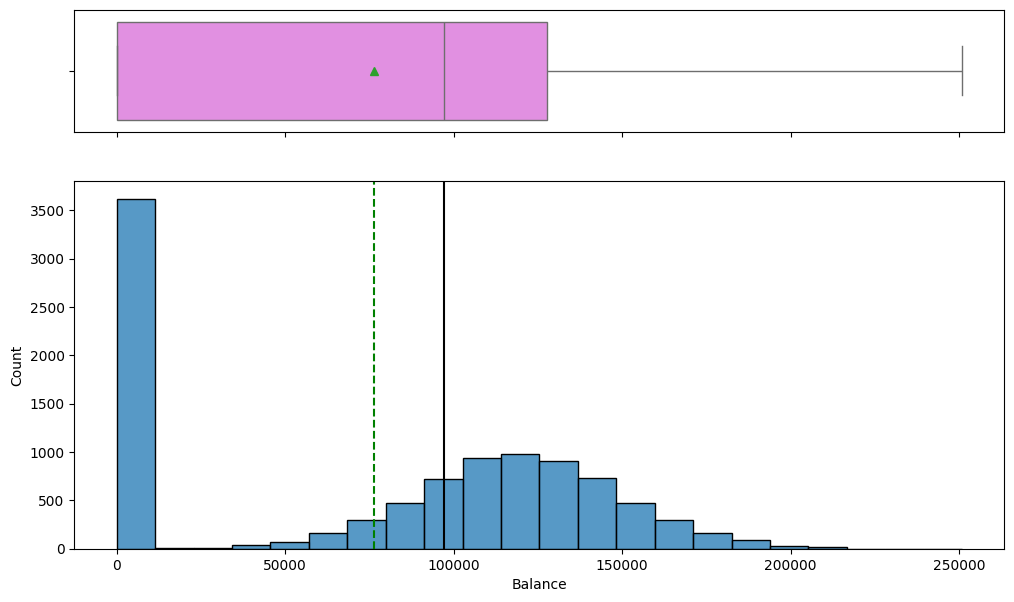

In [21]:
histogram_boxplot(df,'Balance')

Observsations

* For almost 3500 customers pay the balance in full every month .
* There are two peaks one at 0 and ~1000 .
* It is left skewed

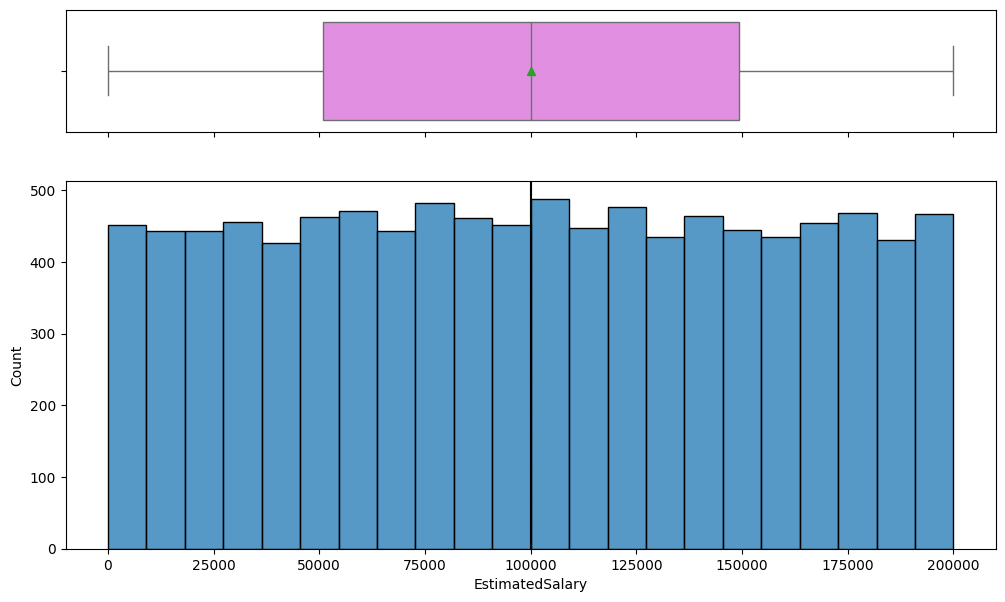

In [22]:
histogram_boxplot(df,'EstimatedSalary')

Observations

* EstimatedSalary is normally distributed

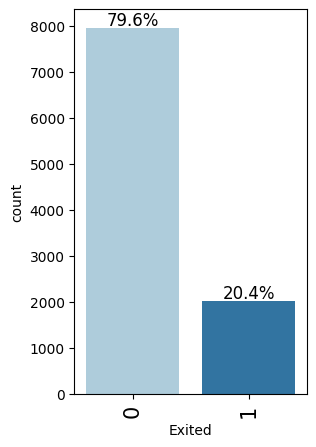

In [23]:
labeled_barplot(df, "Exited", perc=True)

Observations

* 79.6% customers did not left the bank while 20.4% has left

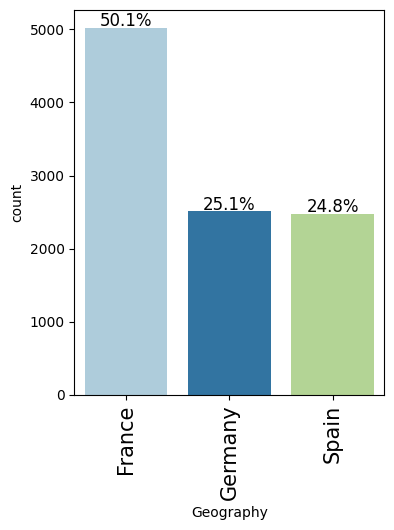

In [24]:
labeled_barplot(df, "Geography", perc=True)

Observations

* More than 50% of the customers are from france , followed by germany and spain

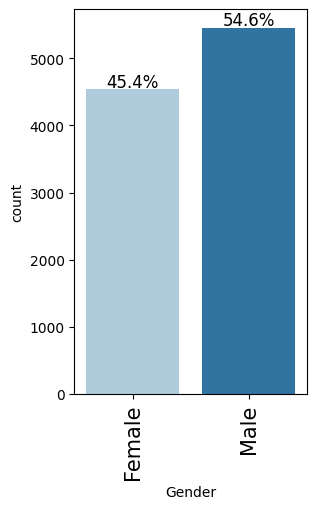

In [25]:
labeled_barplot(df, "Gender", perc=True)

Observations

* 54.6% of customers are male and 45.4% are female .

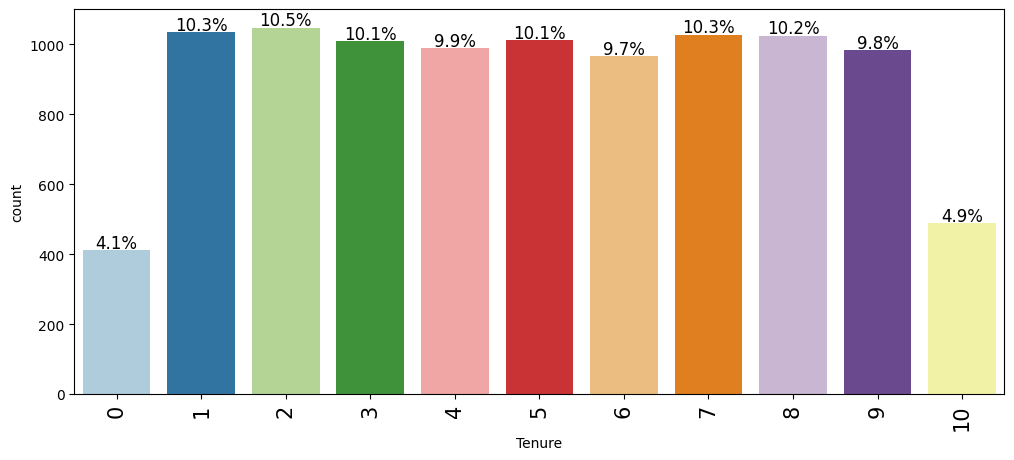

In [26]:
labeled_barplot(df, "Tenure", perc=True)

Observations

* Number of years for which the customer has been with the bank is 2 .
* Almost 10.5% of customers are with the bank for a period of 2 years

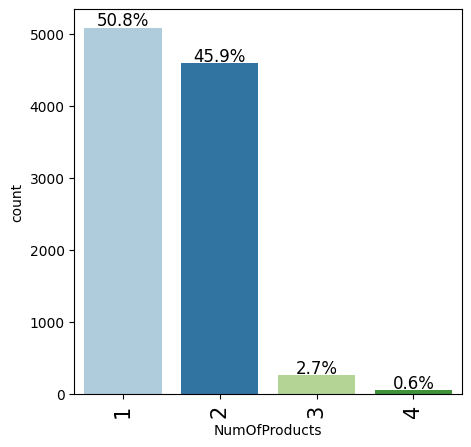

In [27]:
labeled_barplot(df, "NumOfProducts", perc=True)

Observations

* Highest number of products that a customer has purchased through the bank is one followed by 2 .


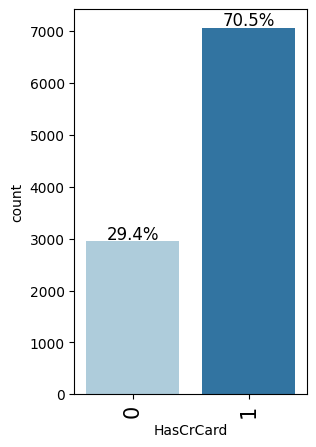

In [28]:
labeled_barplot(df, "HasCrCard", perc=True)

Observations

* 70.5% of customers has credit card
* 29.4% of customers does not have credit card

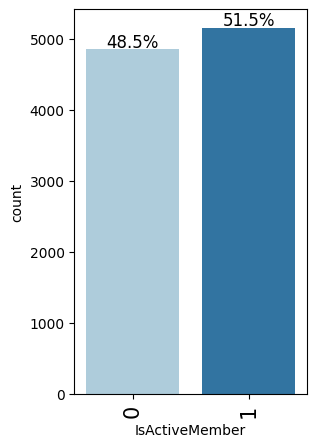

In [29]:
labeled_barplot(df, "IsActiveMember", perc=True)

Observations

* 51.5% of customers is active member of the bank while 48.5% are not

### Bivariate Analysis

In [30]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

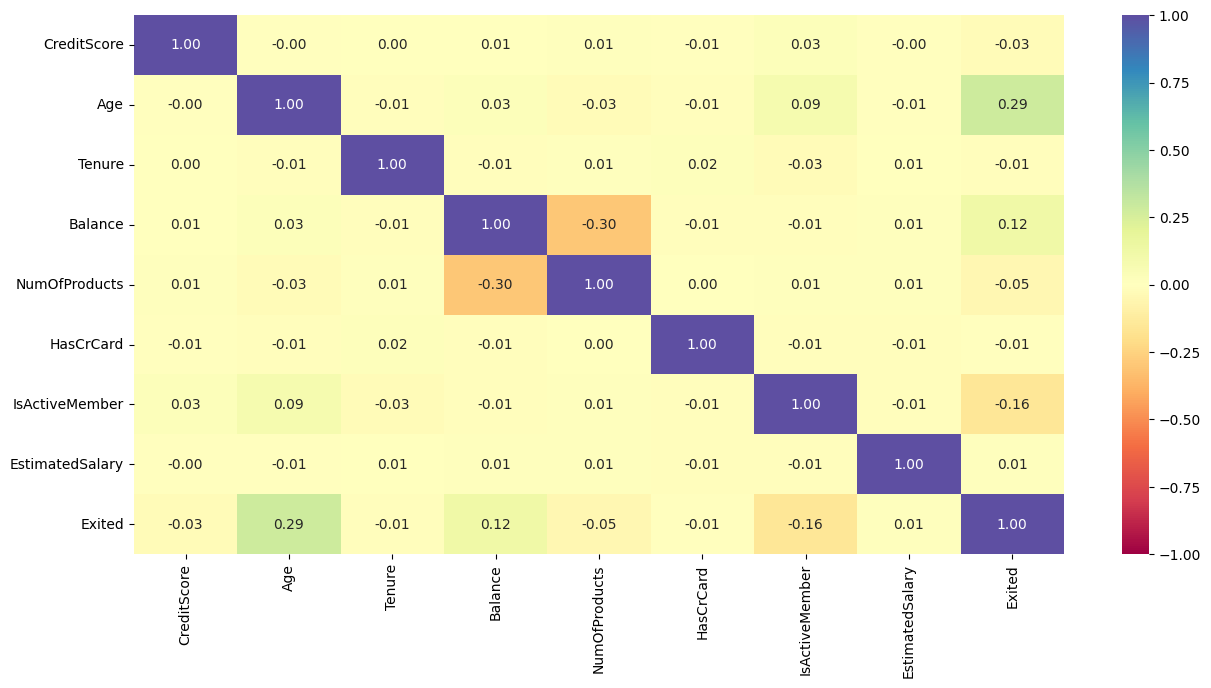

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations

*  Customer Age and Exited are postively correlated .
* Number of products  and Balance are negatively correlated to each other

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


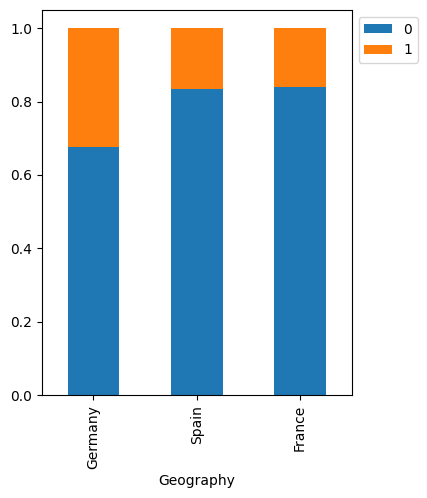

In [32]:
stacked_barplot(df, "Geography", "Exited" )

Observations

* ~32.44% Customers from germany left the bank compared to 10.2% from france and 16.6% from spain


Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


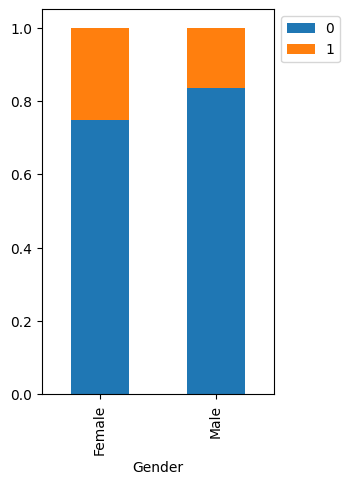

In [33]:
stacked_barplot(df, "Gender", "Exited" )

Observations

* ~25% of female customers left bank more than ~16% of male customers

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


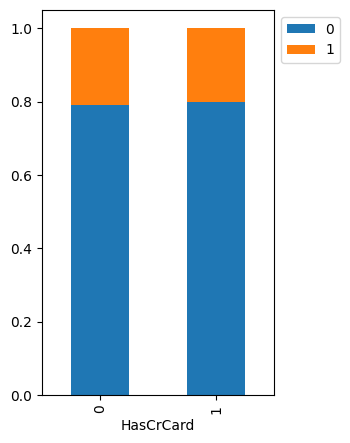

In [34]:
stacked_barplot(df, "HasCrCard", "Exited" )

Observations

* Percentage of Customers who doesn't have credit card and who has credit card leaving bank is same i.e ~20%

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


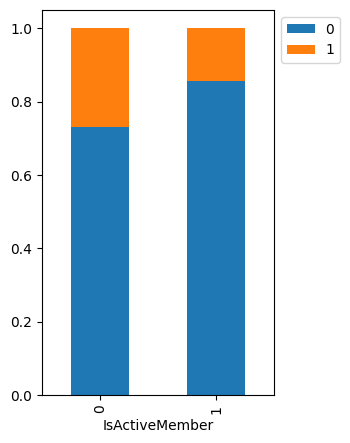

In [35]:
stacked_barplot(df, "IsActiveMember", "Exited" )

Observations

* ~26% of customers who are not active leave bank more than ~14% of customers who are active member

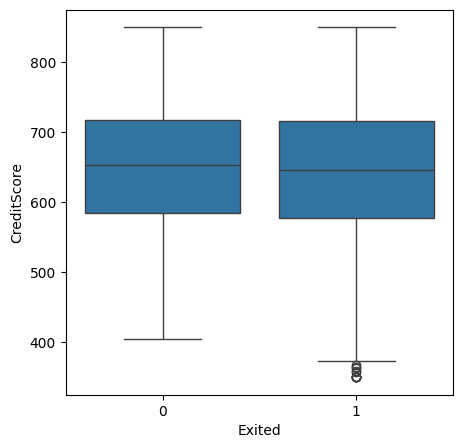

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

Observations

* Credit score  don't seem to have any impact on the target variable.


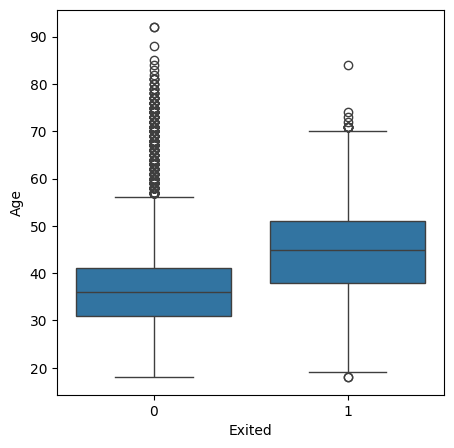

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)
plt.show()

Observations

* Customer age greater than ~45 tends to leave bank more .
* There are outliers present

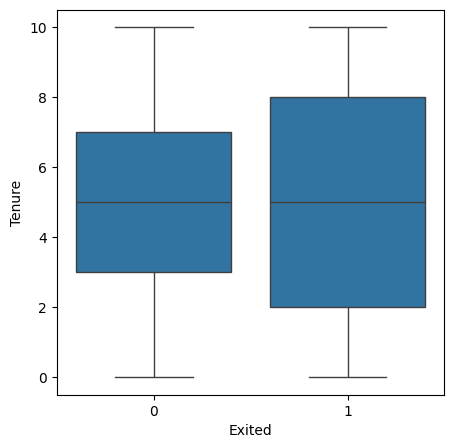

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

Observations

* Customers who has less tenure less than 2 tends to leave the bank more .

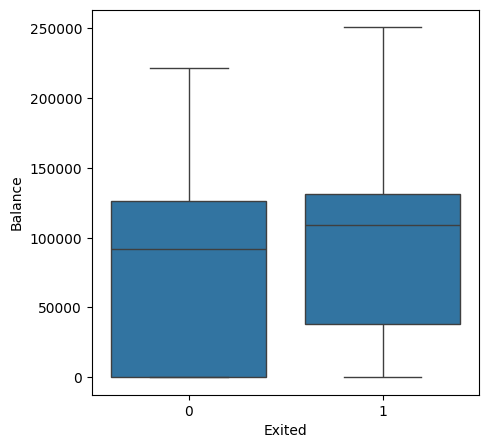

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

Observations

* Credit balance doesn't seem to have any impact on the target variable.

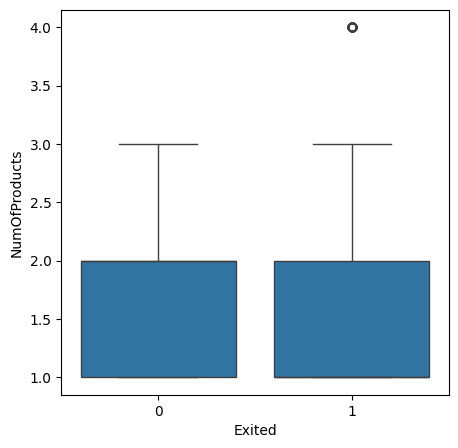

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)
plt.show()

Observations

* Number of products  doesn't seem to have any impact on the target variable.

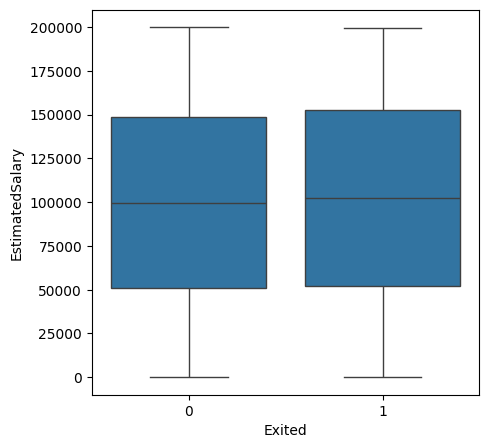

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)
plt.show()

Observations

* Estimated Salary doesn't seem to have any impact on the target variable.

## Data Preprocessing

## Outlier Detection

In [42]:
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [43]:
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

As we can see above , exited has highest outliers after age .

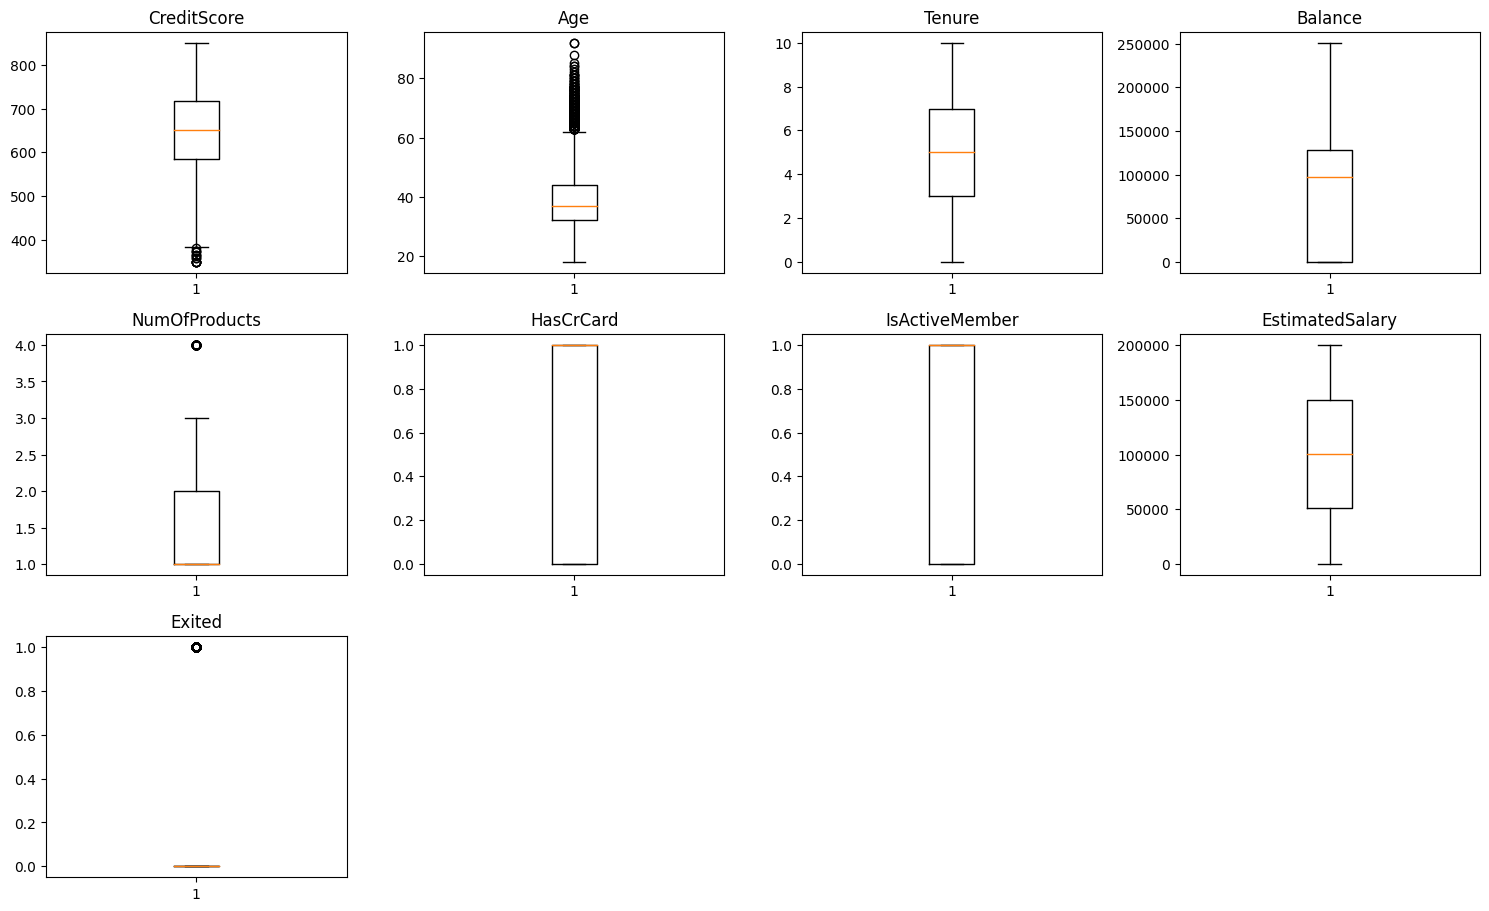

In [44]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.

### Train-validation-test Split

In [45]:
X = df.drop(['Exited'],axis=1)
y = df['Exited'] # Exited

In [46]:
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=y,shuffle = True)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.3, random_state = 42,stratify=y_large, shuffle = True)

In [48]:
print(X_train.shape, X_val.shape, X_test.shape)

(6300, 10) (2700, 10) (1000, 10)


In [49]:
print(y_train.shape, y_val.shape, y_test.shape)

(6300,) (2700,) (1000,)


### Dummy Variable Creation

In [50]:
#Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

In [51]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 11)
(2700, 11)
(6300,)
(2700,)
(1000, 11)
(1000,)


### Data Normalization

In [52]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.fit_transform(X_val[cols_list])
X_test[cols_list] = sc.fit_transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:



*   Predicting an customer will leave and the customer doesn't leave the bank
*   Predicting an customer will not leave and the customer leaves



### Which case is more important?
Predicting that customer will not leave but he leave bank  i.e. losing on a valuable customer or asset.
### How to reduce this loss i.e need to reduce False Negatives?
Bank wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the Bank can provide incentives to control exiting of customers rate especially for top-performers thereby optimizing the overall project cost in retaining the best talent.

-


In [53]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [54]:
#Creating two list to save all the training and validation metrics
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_0.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_0.add(Dense(1, activation = 'sigmoid'))

In [57]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observations

* The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
* It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
* In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (11*64)+64 = 768
* In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080


In [58]:
# Initializing the Optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001)
# Compiling the model with 'binary_crossentropy' as loss function and metrics
model_0.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',keras.metrics.Recall()])
# Fitting the model on train and validation with 50 epochs
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
197/197 [==============================] - 3s 8ms/step - loss: 0.7120 - accuracy: 0.6010 - recall: 0.5511 - val_loss: 0.5240 - val_accuracy: 0.7448 - val_recall: 0.2400
Epoch 2/50
197/197 [==============================] - 2s 8ms/step - loss: 0.5108 - accuracy: 0.7644 - recall: 0.1660 - val_loss: 0.4971 - val_accuracy: 0.7770 - val_recall: 0.1273
Epoch 3/50
197/197 [==============================] - 2s 11ms/step - loss: 0.4955 - accuracy: 0.7765 - recall: 0.1154 - val_loss: 0.4901 - val_accuracy: 0.7804 - val_recall: 0.1127
Epoch 4/50
197/197 [==============================] - 2s 12ms/step - loss: 0.4878 - accuracy: 0.7783 - recall: 0.1037 - val_loss: 0.4850 - val_accuracy: 0.7822 - val_recall: 0.1055
Epoch 5/50
197/197 [==============================] - 1s 7ms/step - loss: 0.4819 - accuracy: 0.7800 - recall: 0.1044 - val_loss: 0.4810 - val_accuracy: 0.7826 - val_recall: 0.1018
Epoch 6/50
197/197 [==============================] - 1s 7ms/step - loss: 0.4769 - accuracy: 0.782

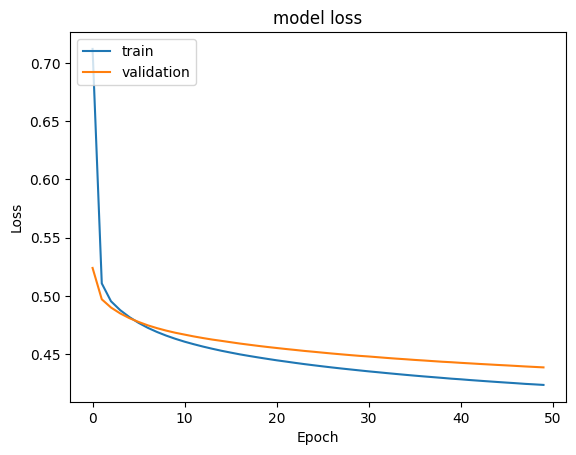

In [59]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations

* Here the model seems to be slightly overfitted, as the distance between the train curve and validation curve started increasing as the epoch increases .

In [60]:
print(history_0.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


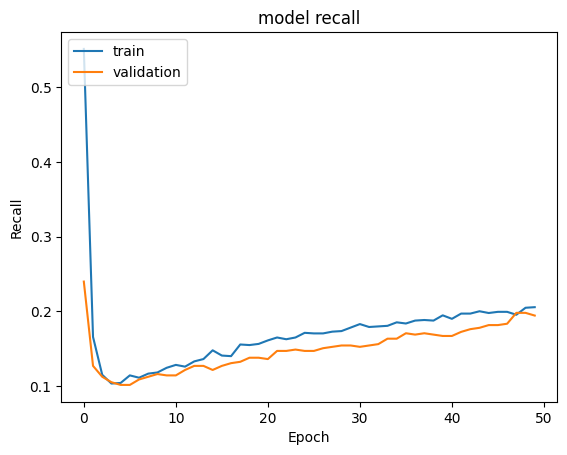

In [61]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations

* The train and validation curves are smooth after using SGD, although they appear to be slightly overfitted.

In [62]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [63]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [64]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [65]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5017
           1       0.63      0.21      0.31      1283

    accuracy                           0.81      6300
   macro avg       0.73      0.59      0.60      6300
weighted avg       0.79      0.81      0.77      6300



In [66]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2150
           1       0.60      0.19      0.29       550

    accuracy                           0.81      2700
   macro avg       0.71      0.58      0.59      2700
weighted avg       0.78      0.81      0.77      2700



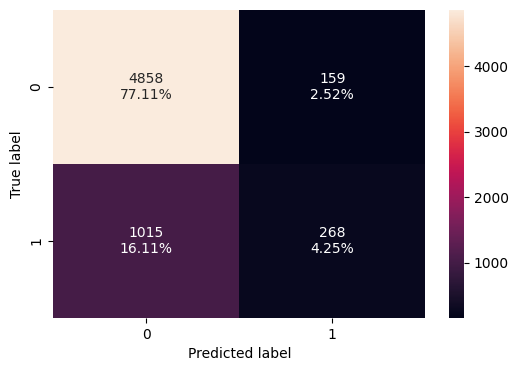

In [67]:
make_confusion_matrix(y_train, y_train_pred)

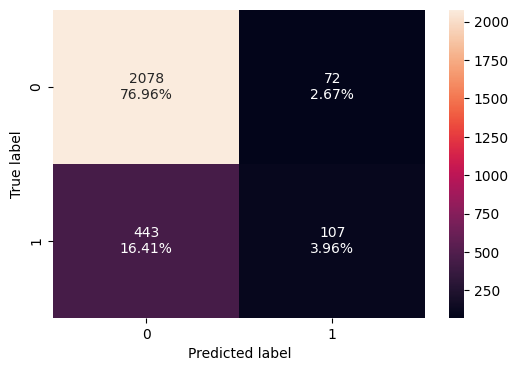

In [68]:
make_confusion_matrix(y_val, y_val_pred)

Observations

*   Class 0 has a higher precision (0.83) compared to class 1 (0.58), indicating that the model is better at correctly predicting class 0 instances.
* Class 0 also has a higher recall (0.96) compared to class 1 (0.21), indicating that the model is better at capturing all positive instances of class 0 but performs poorly in identifying class 1 instances.
* The F1-score, which balances precision and recall, is higher for class 0 (0.89) than for class 1 (0.31), further highlighting the better performance of the model for class 0.
* The support values indicate the number of instances for each class in the dataset (2150 for class 0 and 550 for class 1).
* The overall accuracy of the model is 0.81, indicating that it correctly predicts the class for 81% of the instances in the dataset.
* The macro average (0.70) and weighted average (0.78 for precision, 0.81 for recall, and 0.77 for F1-score) provide a summary of the overall performance across both classes, with the weighted average giving more weight to the class with more instances (class 0 in this case).

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [69]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [70]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [71]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observations

* Hidden Layer:

    - First Hidden Layer (Dense): 64 units/neurons with a total of 768 parameters (64 * 12 (inputs) + 64 (bias)), using a relu activation function.
    - Second Hidden Layer (Dense): 32 units/neurons with a total of 2080 parameters (32 * 64 (inputs from previous layer) + 32 (bias)), using a relu activation function.

* Output Layer:

     - Output Layer (Dense): 1 unit/neuron with a total of 33 parameters (32 * 1 (inputs from previous layer) + 1 (bias)), using a relu activation function.
     - Total Parameters: The total number of trainable parameters in the model is 2881.

* Trainable Parameters: All the parameters in this model are trainable.

* Non-trainable Parameters: There are no non-trainable parameters in this model.

* This model seems to be a simple feedforward neural network with two hidden layers, each followed by a simoid activation function.








In [72]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [73]:
metric = keras.metrics.Recall()
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [74]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

#history_0 = model_0.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
197/197 [==============================] - 2s 4ms/step - loss: 0.4540 - recall: 0.1715 - val_loss: 0.4269 - val_recall: 0.2509
Epoch 2/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4133 - recall: 0.2603 - val_loss: 0.4217 - val_recall: 0.2309
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4042 - recall: 0.2931 - val_loss: 0.4145 - val_recall: 0.3255
Epoch 4/50
197/197 [==============================] - 1s 3ms/step - loss: 0.3963 - recall: 0.3235 - val_loss: 0.4110 - val_recall: 0.2855
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 0.3897 - recall: 0.3305 - val_loss: 0.4055 - val_recall: 0.3418
Epoch 6/50
197/197 [==============================] - 1s 4ms/step - loss: 0.3832 - recall: 0.3671 - val_loss: 0.4034 - val_recall: 0.2945
Epoch 7/50
197/197 [==============================] - 1s 4ms/step - loss: 0.3770 - recall: 0.3632 - val_loss: 0.4009 - val_recall: 0.3418
Epoch 8/50
197/197 [==============

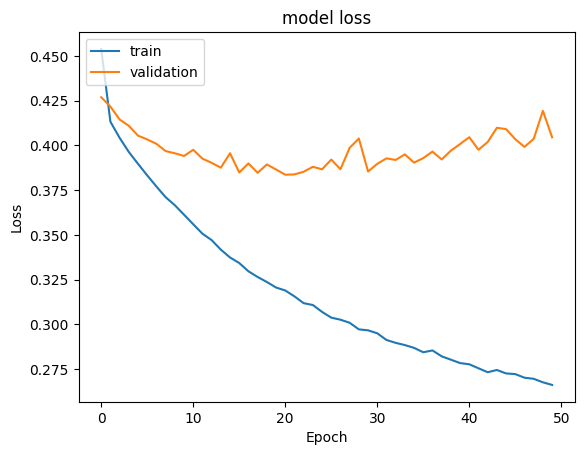

In [75]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations

* The model seems to be overfitted, as the distance between the train curve and validation curve started increasing.

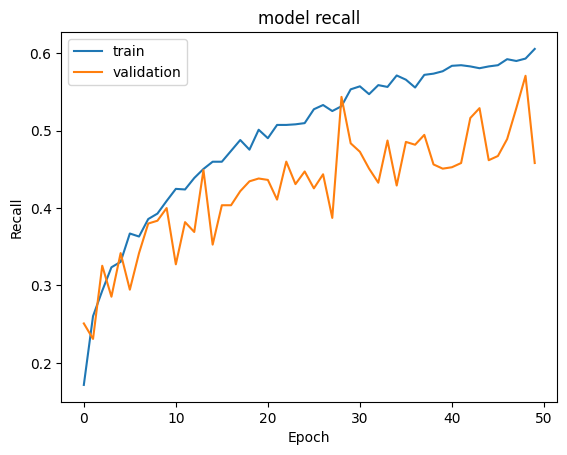

In [76]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observatios

* Model recall seems to slighly overlap each other but there is scope for improvement


In [77]:
#Predicting the results using 0.5 as the threshold
y_train_pred=model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [78]:
#Predicting the results using 0.5 as the threshold
y_val_pred=model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [79]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [80]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5017
           1       0.85      0.59      0.69      1283

    accuracy                           0.89      6300
   macro avg       0.87      0.78      0.81      6300
weighted avg       0.89      0.89      0.89      6300



In [81]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2150
           1       0.65      0.46      0.54       550

    accuracy                           0.84      2700
   macro avg       0.76      0.70      0.72      2700
weighted avg       0.83      0.84      0.83      2700



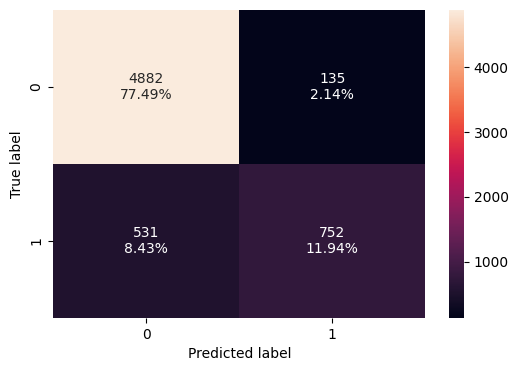

In [82]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

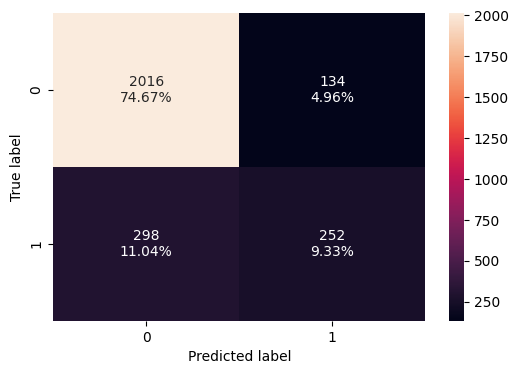

In [83]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

Observations

####  Class 0:

* Precision of 0.87 indicates that when the model predicts class 0, it is correct about 87% of the time.
* Recall of 0.94 indicates that the model correctly identifies about 94% of all actual class 0 instances.

## Class 1:

* Precision of 0.65 indicates that when the model predicts class 1, it is correct about 65% of the time.
* Recall of 0.46 indicates that the model correctly identifies about 46% of all

## Overall:

* The accuracy of 0.84 indicates that the model correctly predicts the class for 84% of all instances in the dataset.

* The macro average precision (0.76) and recall (0.70) provide an overall measure of the model's performance across both classes.


## Conculsion

* It seems from the classification report of training and validation that the model is **overfitting** on class 1 accuracy , which we see difference of (59 - 46)13% drop from training  to validation

### Neural Network with Adam Optimizer and Dropout

In [84]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [85]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu'))
#  add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu'))
#  add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.2))
#  add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
#  add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [86]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()

In [87]:
## compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [88]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
197/197 [==============================] - 2s 4ms/step - loss: 0.4852 - recall: 0.0187 - val_loss: 0.4428 - val_recall: 0.0018
Epoch 2/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4405 - recall: 0.1083 - val_loss: 0.4307 - val_recall: 0.1909
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4319 - recall: 0.1535 - val_loss: 0.4224 - val_recall: 0.2600
Epoch 4/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4187 - recall: 0.2775 - val_loss: 0.4162 - val_recall: 0.2909
Epoch 5/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4101 - recall: 0.2938 - val_loss: 0.4081 - val_recall: 0.3582
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.4073 - recall: 0.3188 - val_loss: 0.4047 - val_recall: 0.3382
Epoch 7/50
197/197 [==============================] - 1s 3ms/step - loss: 0.3970 - recall: 0.3554 - val_loss: 0.4001 - val_recall: 0.3364
Epoch 8/50
197/197 [==============

**Loss function**

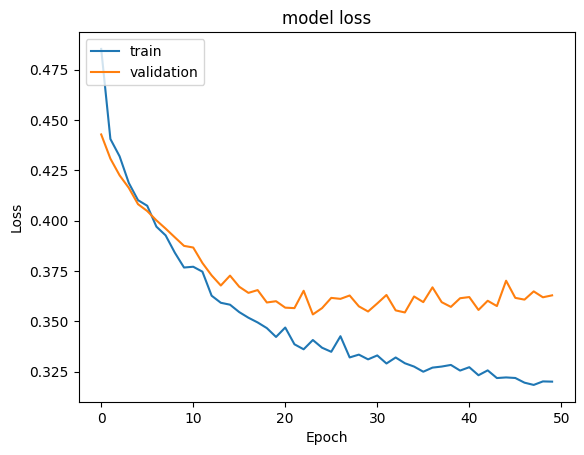

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are diverging as the epoch is increasing. Reducing the number of neurons and adding dropouts to the model didn't worked, and the problem of overfitting remains.

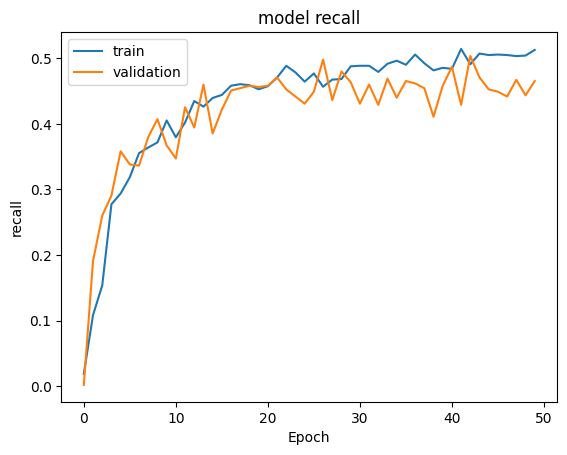

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot , the train and validation recalls are not overlapping in plots, it typically indicates that the model is not generalizing well to unseen data.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred=model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred=model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5017
           1       0.82      0.53      0.65      1283

    accuracy                           0.88      6300
   macro avg       0.86      0.75      0.79      6300
weighted avg       0.88      0.88      0.87      6300



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2150
           1       0.68      0.47      0.55       550

    accuracy                           0.85      2700
   macro avg       0.78      0.70      0.73      2700
weighted avg       0.83      0.85      0.83      2700



**Confusion matrix**

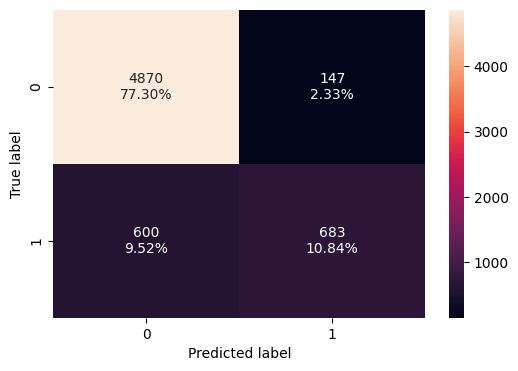

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

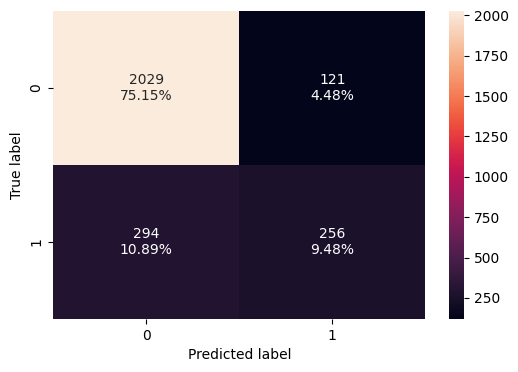

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10034, 11)
After UpSampling, the shape of train_y: (10034,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',kernel_initializer='he_uniform',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1201 (4.69 KB)
Trainable params: 1201 (4.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
314/314 [==============================] - 2s 5ms/step - loss: 0.7024 - recall: 0.4915 - val_loss: 0.6949 - val_recall: 0.4964
Epoch 2/50
314/314 [==============================] - 1s 3ms/step - loss: 0.6882 - recall: 0.4782 - val_loss: 0.6797 - val_recall: 0.5255
Epoch 3/50
314/314 [==============================] - 1s 2ms/step - loss: 0.6769 - recall: 0.5081 - val_loss: 0.6677 - val_recall: 0.5273
Epoch 4/50
314/314 [==============================] - 1s 2ms/step - loss: 0.6668 - recall: 0.5348 - val_loss: 0.6584 - val_recall: 0.5582
Epoch 5/50
314/314 [==============================] - 1s 2ms/step - loss: 0.6576 - recall: 0.5637 - val_loss: 0.6496 - val_recall: 0.5727
Epoch 6/50
314/314 [==============================] - 1s 2ms/step - loss: 0.6489 - recall: 0.5864 - val_loss: 0.6410 - val_recall: 0.5818
Epoch 7/50
314/314 [==============================] - 1s 2ms/step - loss: 0.6409 - recall: 0.5966 - val_loss: 0.6345 - val_recall: 0.5909
Epoch 8/50
314/314 [==============

**Loss function**

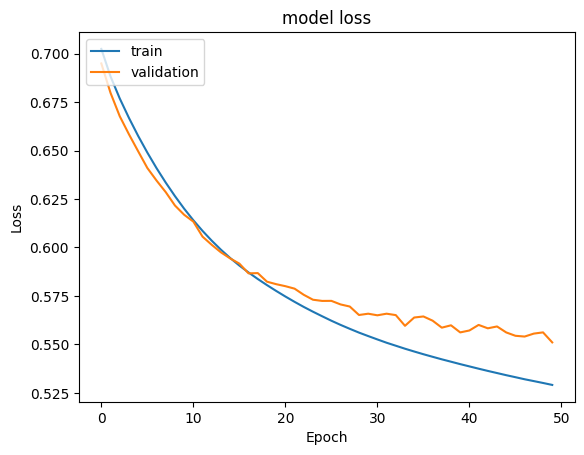

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

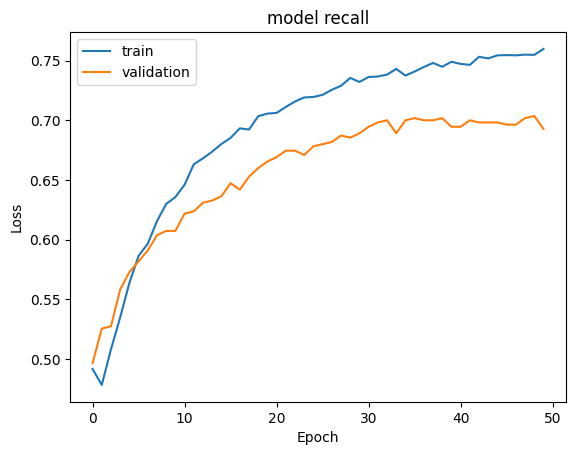

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5017
           1       0.74      0.75      0.75      5017

    accuracy                           0.74     10034
   macro avg       0.74      0.74      0.74     10034
weighted avg       0.74      0.74      0.74     10034



In [ ]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      2150
           1       0.39      0.69      0.50       550

    accuracy                           0.72      2700
   macro avg       0.65      0.71      0.65      2700
weighted avg       0.80      0.72      0.74      2700



**Confusion matrix**

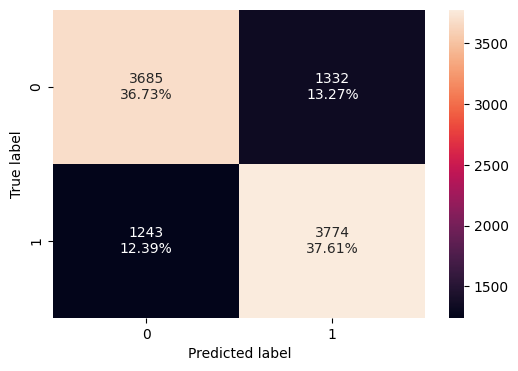

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

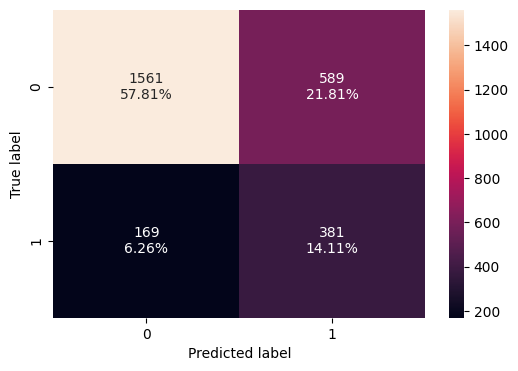

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2913 (11.38 KB)
Trainable params: 2913 (11.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2913 (11.38 KB)
Trainable params: 2913 (11.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=50,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
314/314 [==============================] - 2s 3ms/step - loss: 0.5681 - recall: 0.7054 - val_loss: 0.4907 - val_recall: 0.6018
Epoch 2/50
314/314 [==============================] - 1s 2ms/step - loss: 0.5076 - recall: 0.7660 - val_loss: 0.5694 - val_recall: 0.7327
Epoch 3/50
314/314 [==============================] - 1s 3ms/step - loss: 0.4785 - recall: 0.7805 - val_loss: 0.4804 - val_recall: 0.6309
Epoch 4/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4558 - recall: 0.7867 - val_loss: 0.4602 - val_recall: 0.6255
Epoch 5/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4388 - recall: 0.7941 - val_loss: 0.4363 - val_recall: 0.6073
Epoch 6/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4257 - recall: 0.8005 - val_loss: 0.5019 - val_recall: 0.7291
Epoch 7/50
314/314 [==============================] - 1s 3ms/step - loss: 0.4153 - recall: 0.8071 - val_loss: 0.4535 - val_recall: 0.6673
Epoch 8/50
314/314 [==============

**Loss function**

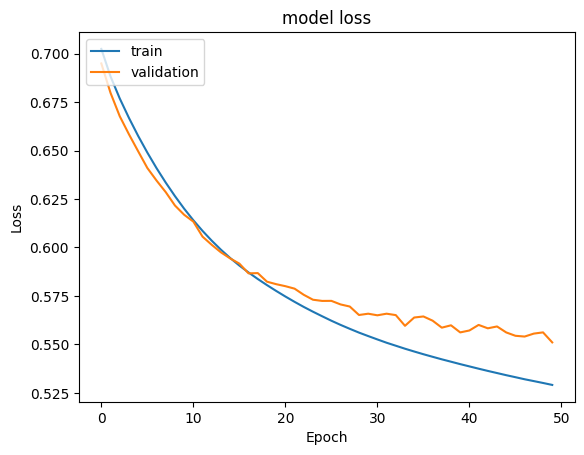

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

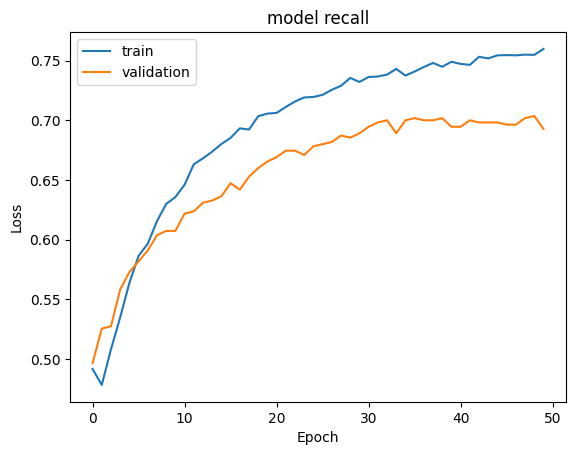

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      5017
           1       0.87      0.87      0.87      5017

    accuracy                           0.87     10034
   macro avg       0.87      0.87      0.87     10034
weighted avg       0.87      0.87      0.87     10034



In [ ]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2150
           1       0.48      0.63      0.55       550

    accuracy                           0.78      2700
   macro avg       0.69      0.73      0.70      2700
weighted avg       0.81      0.78      0.80      2700



**Confusion matrix**

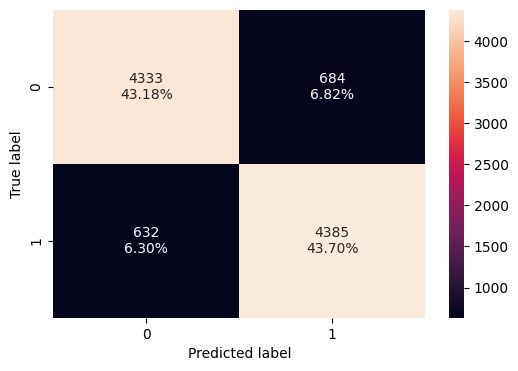

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

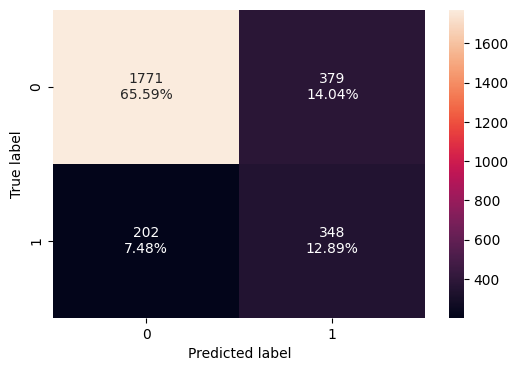

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=50, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
314/314 [==============================] - 3s 5ms/step - loss: 0.6224 - recall: 0.7803 - val_loss: 0.5030 - val_recall: 0.5218
Epoch 2/50
314/314 [==============================] - 1s 4ms/step - loss: 0.5424 - recall: 0.6845 - val_loss: 0.5327 - val_recall: 0.6255
Epoch 3/50
314/314 [==============================] - 1s 3ms/step - loss: 0.5145 - recall: 0.7190 - val_loss: 0.4816 - val_recall: 0.5600
Epoch 4/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4986 - recall: 0.7341 - val_loss: 0.4837 - val_recall: 0.5836
Epoch 5/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4887 - recall: 0.7441 - val_loss: 0.4867 - val_recall: 0.6182
Epoch 6/50
314/314 [==============================] - 1s 2ms/step - loss: 0.4734 - recall: 0.7497 - val_loss: 0.5105 - val_recall: 0.6709
Epoch 7/50
314/314 [==============================] - 1s 3ms/step - loss: 0.4635 - recall: 0.7684 - val_loss: 0.5040 - val_recall: 0.6727
Epoch 8/50
314/314 [==============

**Loss function**

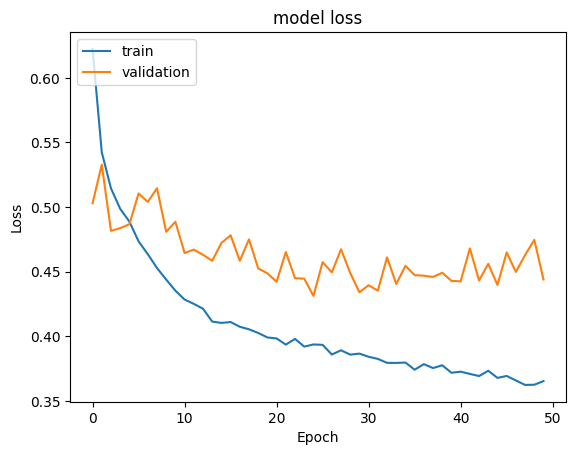

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

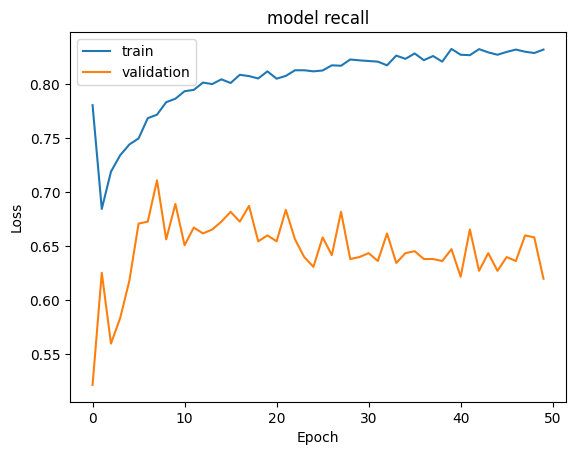

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5017
           1       0.87      0.85      0.86      5017

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2150
           1       0.50      0.62      0.56       550

    accuracy                           0.80      2700
   macro avg       0.70      0.73      0.71      2700
weighted avg       0.82      0.80      0.81      2700



**Confusion matrix**

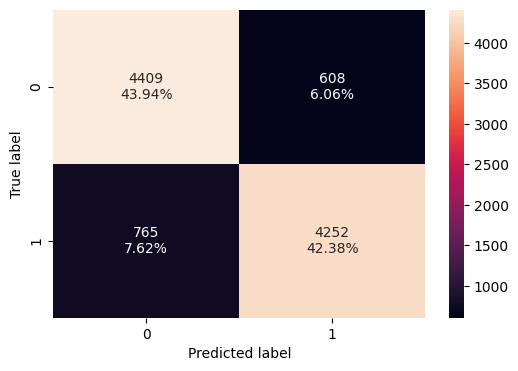

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

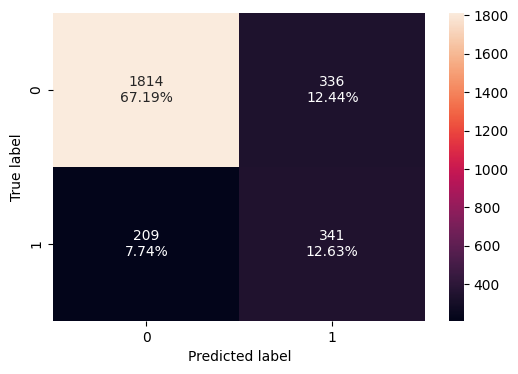

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.208885
NN with Adam,0.586126
NN with Adam & Dropout,0.532346
NN with SMOTE & SGD,0.752242
NN with SMOTE & Adam,0.874028
"NN with SMOTE,Adam & Dropout",0.847518


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.194545
NN with Adam,0.458182
NN with Adam & Dropout,0.465455
NN with SMOTE & SGD,0.692727
NN with SMOTE & Adam,0.632727
"NN with SMOTE,Adam & Dropout",0.620000


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.014340
NN with Adam,0.127944
NN with Adam & Dropout,0.066892
NN with SMOTE & SGD,0.059515
NN with SMOTE & Adam,0.241301
"NN with SMOTE,Adam & Dropout",0.227518


In [ ]:
y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
#print(y_test_pred)

32/32 [==============================] - 0s 2ms/step


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       796
           1       0.39      0.73      0.51       204

    accuracy                           0.71      1000
   macro avg       0.65      0.72      0.66      1000
weighted avg       0.81      0.71      0.74      1000



In [ ]:
# Calculate the importance of each feature
feature_importance = np.mean(tf.abs(model_3.layers[0].get_weights()[0]), axis=1)
#print(feature_importance)

# Print the importance of each feature
for i, importance in enumerate(feature_importance):
    print(f"Feature {df.columns[i]}: {importance}")


Feature CreditScore: 0.39143669605255127
Feature Geography: 0.36608293652534485
Feature Gender: 0.3755649924278259
Feature Age: 0.4149954617023468
Feature Tenure: 0.3771921396255493
Feature Balance: 0.3661484718322754
Feature NumOfProducts: 0.35275858640670776
Feature HasCrCard: 0.31204766035079956
Feature IsActiveMember: 0.32970380783081055
Feature EstimatedSalary: 0.33537983894348145
Feature Exited: 0.36152803897857666


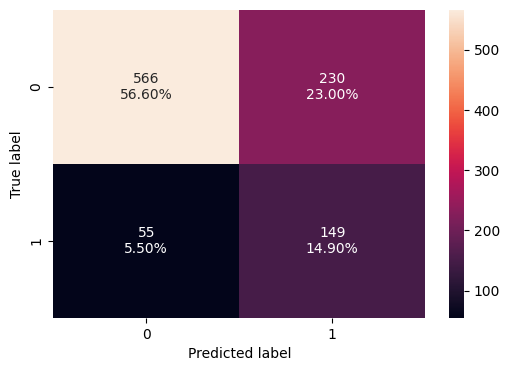

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___